In [1]:
from simulation_functions.KMC_functions import SequenceEnsemble
from fitting_functions.ODE_solving import PetRAFTKineticFitting
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
feed_ratios = np.array([
    [17.6, 0., 0.],
    [11.3, 0.48, 0.85],
    [6.8, 1.15, 1.77],
    [7.3, 2.11, 2.58],
    [9.8, 4.16, 6.78],
    [7.0, 2.71, 5.53],
    [19.9, 7.58, 18.48],
])

r_matrix = np.array([
    [1., 1., 1.],
    [1., 1., 1.],
    [1., 1., 1.]
])

In [5]:
import simulation_functions.KMC_functions
import importlib
importlib.reload(simulation_functions.KMC_functions)
from simulation_functions.KMC_functions import SequenceEnsemble
# feed_ratios = np.array([[27.08, 0.],
#                         [37.41, 7.43],
#                         [26.06, 0.19]])

# r_matrix = np.array([
#     [1., 1.],
#     [1., 1.]
# ])

seq = SequenceEnsemble(500)
all_seqs = seq.run_gradient_copolymer(feed_ratios, 0.05, r_matrix)
# all_seqs = seq.run_block_copolymer(feed_ratios, [0.05, 0.02, 0.02], r_matrix)

# cmap = plt.get_cmap('viridis',5)
# bounds = np.linspace(0,3,4)
# norm = mcolors.BoundaryNorm(bounds, cmap.N)
plt.imshow(all_seqs, cmap='inferno')
plt.colorbar()
plt.show()

Evaluating 'block' number 1


KeyboardInterrupt: 

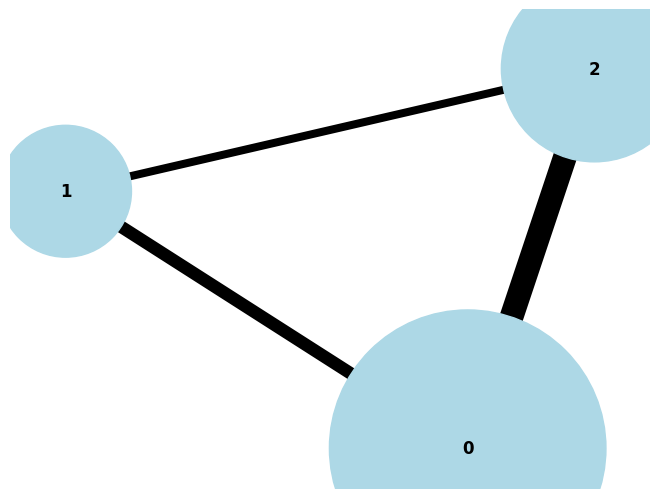

In [13]:
import analysis_functions.sequence_statistics
import importlib
importlib.reload(analysis_functions.sequence_statistics)
from analysis_functions.sequence_statistics import ChainLengthDispersity, MonomerFrequency, ConstructGraph

masses = np.array([87.12, 396.53])

m = ConstructGraph(all_seqs, 3)
# m.get_distribution(masses)
m.get_graph()

In [ ]:
peter_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/PDB-4-98_fractions.csv', header=0)
bridgette_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/B130_MPAM_DMF.csv', header=0)

plt.scatter(peter_data.iloc[:,0], peter_data.iloc[:,1], label="Bridgette - by hand")
plt.scatter(bridgette_data.iloc[:,0], bridgette_data.iloc[:,1], label="Peter - online")
plt.ylim([0,1])
plt.xlabel("Total conversion")
plt.ylabel("MPAM conversion")
plt.legend()
plt.savefig("comparison.png")

In [ ]:
import fitting_functions.ODE_solving
import importlib
importlib.reload(fitting_functions.ODE_solving)
from fitting_functions.ODE_solving import PetRAFTKineticFitting

# f = PetRAFTKineticFitting(peter_data, 97.95, 34.29) # for Peter
# f = PetRAFTKineticFitting(bridgette_data, 88.1, 31.64) # for Bridgette
f = PetRAFTKineticFitting(bridgette_data, 70., 30.) 
f.test_values(1, 50, 50, 1)
# f.display_overlay([1, 2, 1, 10])